In [1]:
import tensorflow as tf
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.python.keras.layers import Conv2D

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dense, Flatten, BatchNormalization, MaxPool2D
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.metrics import categorical_crossentropy
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os
import shutil
import random
import glob

In [ ]:
# Organize data into trai, valid, test dirs
os.chdir('C:/Users/aboubakiri.diaw/deploiement recomm/fcbdata')
if os.path.isdir('train/iniesta') is False:
    os.makedirs('train/iniesta')
    os.makedirs('train/neymar')
    os.makedirs('train/messi')
    os.makedirs('valid/iniesta')
    os.makedirs('valid/neymar')
    os.makedirs('valid/messi')
    os.makedirs('test/iniesta')
    os.makedirs('test/neymar')
    os.makedirs('test/messi')
    for c in random.sample(glob.glob('iniesta*'), 400):
        shutil.move(c, 'train/iniesta')
    for c in random.sample(glob.glob('neymar*'), 300): 
        shutil.move(c, 'train/neymar')
    for c in random.sample(glob.glob('messi*'), 330):
        shutil.move(c, 'train/messi')
    for c in random.sample(glob.glob('iniesta*'), 160):
        shutil.move(c, 'valid/iniesta')
    for c in random.sample(glob.glob('neymar*'), 100):
        shutil.move(c, 'valid/neymar')
    for c in random.sample(glob.glob('messi*'), 100): 
        shutil.move(c, 'valid/messi') 
    for c in random.sample(glob.glob('iniesta*'), 50):
        shutil.move(c, 'test/iniesta') 
    for c in random.sample(glob.glob('neymar*'), 44): 
        shutil.move(c, 'test/neymar') 
    for c in random.sample(glob.glob('messi*'), 42): 
        shutil.move(c, 'test/messi') 

        
os.chdir('../../')     

In [ ]:
train_path = 'C:/Users/aboubakiri.diaw/deploiement recomm/fcbdata/train'
valid_path= 'C:/Users/aboubakiri.diaw/deploiement recomm/fcbdata/valid'
test_path = 'C:/Users/aboubakiri.diaw/deploiement recomm/fcbdata/test'

In [ ]:
train_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['iniesta', 'neymar', 'messi'], batch_size=10)
valid_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['iniesta', 'neymar', 'messi'], batch_size=10)
test_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['iniesta', 'neymar', 'messi'], batch_size=10, shuffle=False )


Found 1030 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 136 images belonging to 3 classes.


In [ ]:
imgs, labels = next(train_batches)

C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
labels 

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# this function will pplot images
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


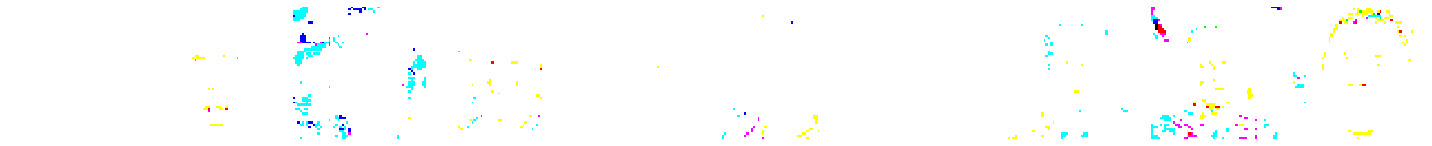

In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
train_batches.class_indices

{'iniesta': 0, 'neymar': 1, 'messi': 2}

## Buil Fine-tuned VGG16 model

In [ ]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import load_model
vgg16_weights ='C:/Users/aboubakiri.diaw/deploiement recomm/keras/vgg16.h5'

vgg16_model = VGG16(weights=vgg16_weights) 

In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(units=3, activation='softmax'))

### Data Augmentation

## Train the fine-tuned VGG16 model

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=25, verbose=2)

Epoch 1/25


C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\aboubakiri.diaw\Anaconda3\lib\site

103/103 - 117s - loss: 1.2156 - acc: 0.2893 - val_loss: 1.1984 - val_acc: 0.2778
Epoch 2/25
103/103 - 120s - loss: 1.1593 - acc: 0.2913 - val_loss: 1.1510 - val_acc: 0.2778
Epoch 3/25
103/103 - 128s - loss: 1.1275 - acc: 0.2913 - val_loss: 1.1224 - val_acc: 0.2778
Epoch 4/25
103/103 - 119s - loss: 1.1103 - acc: 0.2913 - val_loss: 1.1038 - val_acc: 0.2778
Epoch 5/25
103/103 - 116s - loss: 1.1008 - acc: 0.2932 - val_loss: 1.0935 - val_acc: 0.4444
Epoch 6/25
103/103 - 116s - loss: 1.0959 - acc: 0.3883 - val_loss: 1.0872 - val_acc: 0.4444
Epoch 7/25
103/103 - 114s - loss: 1.0936 - acc: 0.3883 - val_loss: 1.0845 - val_acc: 0.4444
Epoch 8/25
103/103 - 115s - loss: 1.0926 - acc: 0.3883 - val_loss: 1.0827 - val_acc: 0.4444
Epoch 9/25
103/103 - 115s - loss: 1.0920 - acc: 0.3883 - val_loss: 1.0811 - val_acc: 0.4444
Epoch 10/25
103/103 - 114s - loss: 1.0919 - acc: 0.3883 - val_loss: 1.0805 - val_acc: 0.4444
Epoch 11/25
103/103 - 115s - loss: 1.0918 - acc: 0.3883 - val_loss: 1.0796 - val_acc: 0.44

In [ ]:
from tensorflow.python.keras.models import load_model
model1 = load_model('C:/Users/aboubakiri.diaw/deploy/best_players.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Predict using fine-tuned VGG16 model

In [ ]:
predictions = model1.predict(x=test_batches, verbose=0)

C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
predictions

array([[9.50236380e-01, 2.93208919e-02, 2.04427205e-02],
       [6.46205783e-01, 2.70748250e-02, 3.26719433e-01],
       [9.88087296e-01, 2.35781120e-03, 9.55499336e-03],
       [8.77290666e-01, 6.76600337e-02, 5.50492033e-02],
       [8.02068114e-01, 8.90259966e-02, 1.08905971e-01],
       [7.99263239e-01, 7.38479793e-02, 1.26888826e-01],
       [9.96159911e-01, 3.16091580e-03, 6.79174263e-04],
       [7.58974552e-01, 2.05428287e-01, 3.55971418e-02],
       [9.36458528e-01, 5.11675663e-02, 1.23739429e-02],
       [8.67948830e-01, 6.05633147e-02, 7.14878738e-02],
       [7.79096186e-01, 9.56262201e-02, 1.25277579e-01],
       [7.55256474e-01, 1.74402282e-01, 7.03413039e-02],
       [9.59307313e-01, 2.73563936e-02, 1.33364061e-02],
       [8.28085095e-02, 2.26706102e-01, 6.90485358e-01],
       [7.50129402e-01, 1.00680307e-01, 1.49190292e-01],
       [8.51448536e-01, 3.70864011e-02, 1.11465111e-01],
       [8.87913406e-02, 1.97823182e-01, 7.13385522e-01],
       [2.11090907e-01, 5.29352

In [ ]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [ ]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
test_batches.class_indices

{'iniesta': 0, 'neymar': 1, 'messi': 2}

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
    print(cm)
    
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j], horizontalalignment="center", 
        color="white" if cm[i,j]> thresh else "black")
                 
                 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix, without normalization
[[34  8  8]
 [ 2 31 11]
 [ 2  6 34]]


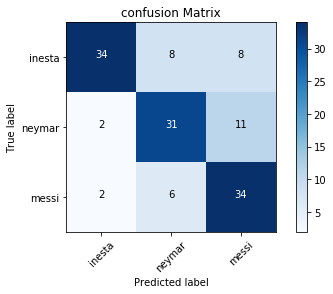

In [ ]:
cm_plot_labels = ['inesta', 'neymar','messi']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion Matrix')

In [ ]:
test1_path='C:/Users/aboubakiri.diaw/deploiement recomm'

In [ ]:
test1_batches = ImageDataGenerator(preprocess_input).flow_from_directory(directory=test1_path, classes=['tes'], target_size=(224,224), batch_size=1, shuffle=False )

Found 1 images belonging to 1 classes.


In [ ]:
predictions = model1.predict(x=test1_batches, verbose=0)

In [ ]:
predictions[0][2]

0.81712425

In [ ]:
classes=np.argmax(predictions, axis=-1)
classes

array([2], dtype=int64)

In [ ]:
#cheks first to see if file exists already
import os.path
if os.path.isfile('C:/Users/aboubakiri.diaw/deploiement recomm/keras/best_players2.h5') is False:
    model.save('C:/Users/aboubakiri.diaw/deploiement recomm/keras/best_players2.h5')

In [ ]:
# cette fonction va dessiner des images 
def plotImages(image_arr):
    fig, axes = plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show

In [ ]:
# image obtenue
image = np.expand_dims(plt.imread(path),0)
plt.imshow(image[0])

print(classes)

if classes==0:
    print("Iniesta")
    
elif classes==1:
    print( "Neymar")
elif classes==2:
    print("Lionel Messi")